# Método de Euler hacia adelante

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101019**

- Autor: Luis M. de la Cruz Salas
- Rev: mié 24 feb 2021 14:41:27 CST

In [2]:
# Celda 1

import numpy as np
import matplotlib.pyplot as plt
import time

# Parámetros para el estilo de las gráficas
params = {'figure.figsize' : (10,7),
          'text.usetex'    : True,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'axes.labelsize' : 20,
          'axes.titlesize' : 20,
          'legend.fontsize': 14,
          'lines.linewidth': 3,
          'lines.markersize': 10,
          'grid.color'     : 'darkgray',
          'grid.linewidth' : 0.5,
          'grid.linestyle' : '--',
          'font.family': 'DejaVu Serif',
         }
plt.rcParams.update(params)

In [3]:
# Celda 2

# Parámetros físicos
L = 1.0   # Longitud del dominio
bA = -1   # Dirichlet en A
bB = 1    # Dirichlet en B
alpha = 1 # Parámetro físico

# Parámetros numéricos
N = 49        # Número de incógnitas
h = L / (N+1) # Tamaño de la malla
ht = 0.0001   # Paso del tiempo
Tmax = 1.0    # Tiempo total de simulación
Nt = int(Tmax / ht) # Número total de pasos
r = ht * alpha / h**2 

tolerancia = 1e-6 # Criterio de termino anticipado

print(" h = ", h, ", ht = ", ht, ", Tmax = ", Tmax, ", Nt = ", Nt)
print(" r = ", r)

 h =  0.02 , ht =  0.0001 , Tmax =  1.0 , Nt =  10000
 r =  0.25


In [4]:
# Celda 3

def grafCondInicial(ax, x,u):
    ax.plot(x,[0 for i in x], '-', c='gray', lw=5)#, label='Malla')
    ax.plot(x,u,'r-',lw=2, label='Cond. inicial')
    ax.plot([0,0],[0,-1], 'k--', lw=1.0)
    ax.plot([1,1],[0,1], 'k--', lw=1.0)
    ax.scatter([0,1],[u[0], u[-1]], fc='blue', ec='k', alpha=0.75, label='Cond. de frontera')

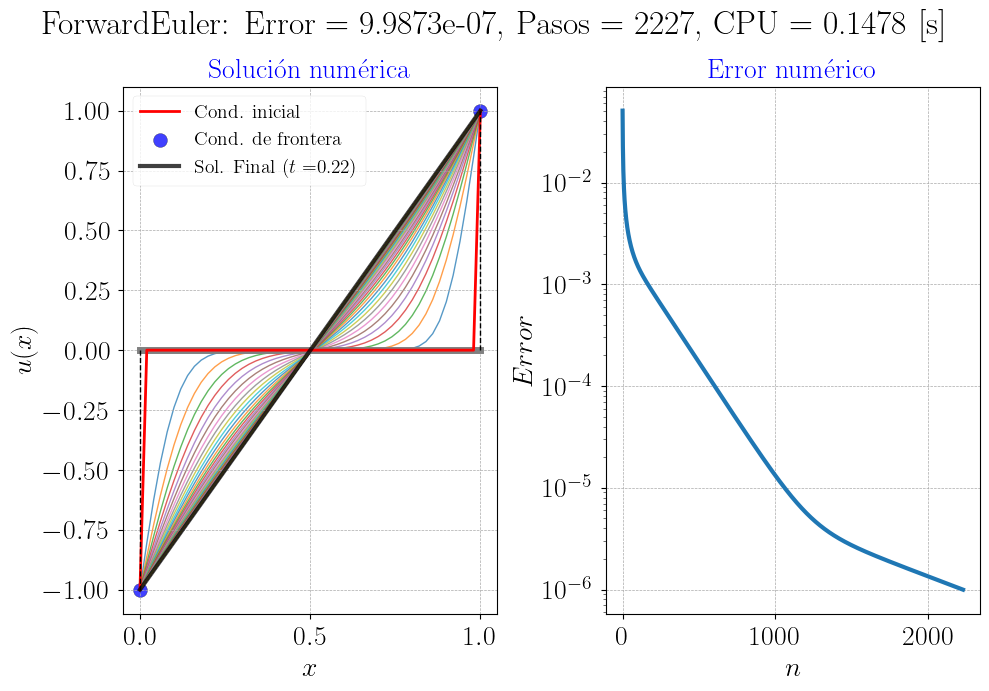

In [5]:
# Celda 4

x = np.linspace(0,L,N+2) # Puntos de la malla
u = np.zeros(N+2)        # Arreglo para la solución

# Condiciones de frontera
u[0] = bA
u[N+1] = bB

suma_tiempos = 0.0 # Tiempo total
error = []  # Errores

# Inicialización de la figura.
fig, (ax1, ax2) = plt.subplots(1, 2)
grafCondInicial(ax1, x,u)

# Ciclo en el tiempo, desde 1 hasta Nt-1
for n in range(1, Nt):
    e = 0.0  
    # Ciclo para resolver en el espacio
    t_start = time.perf_counter()  
    
    for i in range(1,N+1):
        # Método de Euler hacia adelante
        unew = u[i] + r * (u[i-1] - 2 * u[i] + u[i+1])
        e += (unew - u[i])**2 
        u[i] = unew # Actualización
        
    t_stop = time.perf_counter()
    suma_tiempos += (t_stop - t_start) 
    e = np.sqrt(h*e)
    error.append(e)
    
    # Graficación cada 25 pasos
    if n % 25 == 0:
        ax1.plot(x,u,'-', lw = 1.0, alpha = 0.75, zorder=1)

    # Terminación anticipada si se cumple la tolerancia
    if e < tolerancia: 
        break

# Gráficación de resultados
titulo = 'ForwardEuler: Error = {:5.4e}, Pasos = {:4d}, CPU = {:5.4} [s]'.format(e, n, suma_tiempos)
fig.suptitle(titulo, fontsize=24)

ax1.plot(x,u,'-k',lw=3,alpha=0.75,label='Sol. Final ($t=${:3.2f})'.format(n*ht))
ax1.set_xlabel('$x$')
ax1.set_ylabel('$u(x)$')
ax1.grid()
ax1.set_title('Solución numérica', color='blue')
ax1.legend()

ax2.plot(error)
ax2.set_yscale('log')
ax2.set_xlabel('$n$')
ax2.set_ylabel('$Error$')
ax2.set_title('Error numérico', color='blue')
ax2.grid()

plt.tight_layout()
plt.savefig('ForwardEuler.pdf')
plt.show()
